Pertemuan 12: Data Cleaning and Preparation using Pandas

In [2]:
# Exercise 1: Identifying and Handling Missing Data
import pandas as pd

# Sample dataset with missing values
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', None],
    'Age': [24, 30, None, 22, 35],
    'Salary': [48000, None, 57000, None, 60000]
}
df = pd.DataFrame(data)

# Filling missing values and dropping rows
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Salary'] = df['Salary'].fillna(df['Salary'].median())
df.dropna(subset=['Name'], inplace=True)
print('After cleaning:\n', df)


After cleaning:
       Name    Age   Salary
0    Alice  24.00  48000.0
1      Bob  30.00  57000.0
2  Charlie  27.75  57000.0
3    David  22.00  57000.0


In [3]:
# Exercise 2: Standardizing Categorical Data
# Sample dataset with inconsistent categorical values
data = {
    'Product': ['Laptop', 'Laptop', 'Desktop', 'Tablet', 'Tablet'],
    'Category': ['Electronics', 'electronics', 'Electronics', 'Gadgets', 'gadgets']
}
df = pd.DataFrame(data)

# Standardize category values
df['Category'] = df['Category'].str.capitalize()
print('Standardized Data:\n', df)


Standardized Data:
    Product     Category
0   Laptop  Electronics
1   Laptop  Electronics
2  Desktop  Electronics
3   Tablet      Gadgets
4   Tablet      Gadgets


Pertemuan 13: Data Visualization using Matplotlib and Seaborn

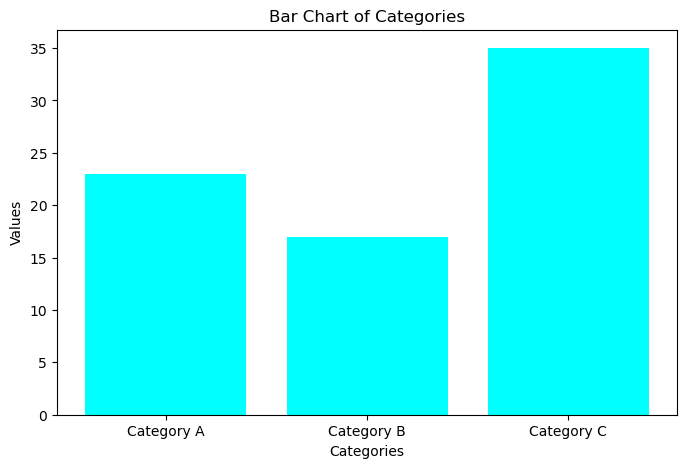

In [1]:
# Exercise 1: Basic Plotting with Matplotlib
import matplotlib.pyplot as plt

# Data for plotting
categories = ['Category A', 'Category B', 'Category C']
values = [23, 17, 35]

# Plot
plt.figure(figsize=(8, 5))
plt.bar(categories, values, color='cyan')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Chart of Categories')
plt.show()


In [3]:
!pip install seaborn



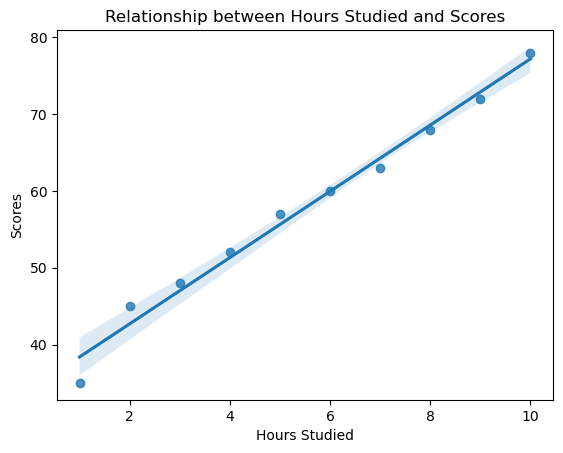

In [4]:
# Exercise 2: Seaborn for Relationship Visualization
import seaborn as sns
import pandas as pd

# Sample data
data = {
    'Hours Studied': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Scores': [35, 45, 48, 52, 57, 60, 63, 68, 72, 78]
}
df = pd.DataFrame(data)

# Plot
sns.regplot(x='Hours Studied', y='Scores', data=df)
plt.title('Relationship between Hours Studied and Scores')
plt.show()


Practice Tasks 12

    Load a dataset of your choice and identify missing values.
    Implement data transformations to normalize numerical columns.
    Standardize categorical columns and remove duplicates.


In [2]:
df = pd.read_csv("train_and_test2.xls")
print(df.columns.tolist())


['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'zero', 'zero.1', 'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'Parch', 'zero.7', 'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13', 'zero.14', 'Pclass', 'zero.15', 'zero.16', 'Embarked', 'zero.17', 'zero.18', '2urvived']


In [3]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("train_and_test2.xls")

# 1. Cek info & missing values
print(df.info())
print("\nMissing values per kolom:")
print(df.isnull().sum())

# 2. Isi missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# 3. Normalisasi kolom numerik (Min-Max manual)
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Hilangkan kolom ID & kolom target
num_cols = num_cols.drop(['Passengerid', '2urvived'], errors='ignore')

for col in num_cols:
    min_val = df[col].min()
    max_val = df[col].max()
    if max_val - min_val != 0:  # cegah pembagian 0
        df[col] = (df[col] - min_val) / (max_val - min_val)
    else:
        df[col] = 0

# 4. One-Hot Encoding pada kolom kategorikal
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# 5. Menghapus duplikat
before = df.shape[0]
df = df.drop_duplicates()
after = df.shape[0]
print(f"\nJumlah baris sebelum drop duplikat: {before}, sesudah: {after}")

# 6. Tampilkan hasil akhir
print("\n=== Info setelah preprocessing ===")
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   sibsp        1309 non-null   int64  
 5   zero         1309 non-null   int64  
 6   zero.1       1309 non-null   int64  
 7   zero.2       1309 non-null   int64  
 8   zero.3       1309 non-null   int64  
 9   zero.4       1309 non-null   int64  
 10  zero.5       1309 non-null   int64  
 11  zero.6       1309 non-null   int64  
 12  Parch        1309 non-null   int64  
 13  zero.7       1309 non-null   int64  
 14  zero.8       1309 non-null   int64  
 15  zero.9       1309 non-null   int64  
 16  zero.10      1309 non-null   int64  
 17  zero.11      1309 non-null   int64  
 18  zero.12      1309 non-null   int64  
 19  zero.1

,Passengerid,Age,Fare,sibsp,zero,zero.1,zero.2,zero.3,zero.4,zero.5,...,zero.14,Pclass,zero.15,zero.16,zero.17,zero.18,2urvived,Sex_1.0,Embarked_0.5,Embarked_1.0
0,1,0.273456,0.014151,0.125,0,0,0,0,0,0,...,0,1.0,0,0,0,0,0,False,False,True
1,2,0.473882,0.139136,0.125,0,0,0,0,0,0,...,0,0.0,0,0,0,0,1,True,False,False
2,3,0.323563,0.015469,0.000,0,0,0,0,0,0,...,0,1.0,0,0,0,0,1,True,False,True
3,4,0.436302,0.103644,0.125,0,0,0,0,0,0,...,0,0.0,0,0,0,0,1,True,False,True
4,5,0.436302,0.015713,0.000,0,0,0,0,0,0,...,0,1.0,0,0,0,0,0,False,False,True


### Practice Tasks
- Use Matplotlib to create a multi-bar chart to compare data across groups.
- Generate scatter plots with Seaborn to explore relationships between variables in a dataset.
- Customize plot layouts and color schemes.

In [6]:
print(df.columns.tolist())

['Passengerid', 'Age', 'Fare', 'sibsp', 'zero', 'zero.1', 'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'Parch', 'zero.7', 'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13', 'zero.14', 'Pclass', 'zero.15', 'zero.16', 'zero.17', 'zero.18', '2urvived', 'Sex_1.0', 'Embarked_0.5', 'Embarked_1.0']


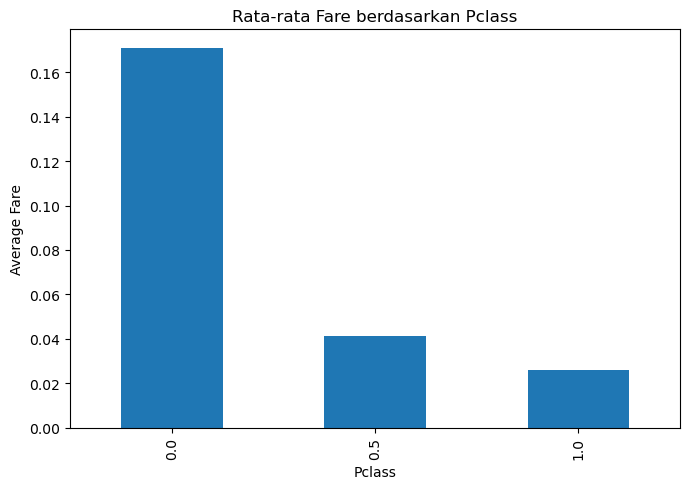

In [8]:
import matplotlib.pyplot as plt

grouped = df.groupby('Pclass')['Fare'].mean()

plt.figure(figsize=(7,5))
grouped.plot(kind='bar')

plt.title("Rata-rata Fare berdasarkan Pclass")
plt.xlabel("Pclass")
plt.ylabel("Average Fare")
plt.tight_layout()
plt.show()


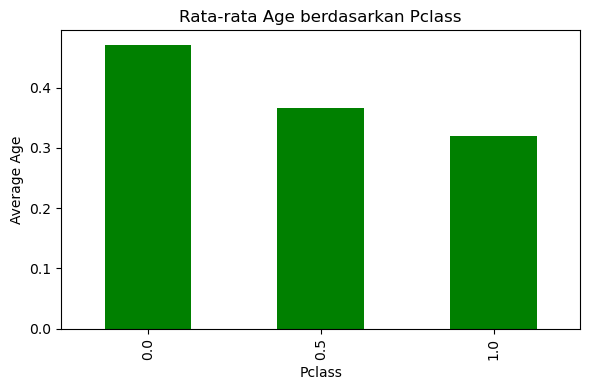

In [9]:
grouped_age = df.groupby('Pclass')['Age'].mean()

plt.figure(figsize=(6,4))
grouped_age.plot(kind='bar', color='green')

plt.title("Rata-rata Age berdasarkan Pclass")
plt.xlabel("Pclass")
plt.ylabel("Average Age")
plt.tight_layout()
plt.show()


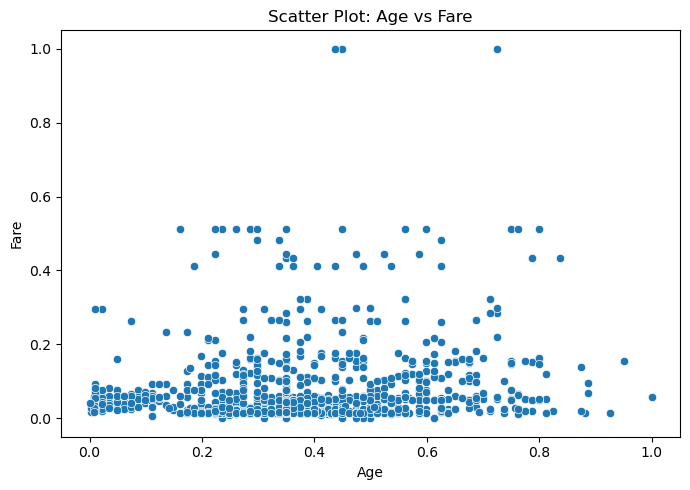

In [10]:
import seaborn as sns

plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='Age', y='Fare') #color="green"

plt.title("Scatter Plot: Age vs Fare")
plt.tight_layout()
plt.show()


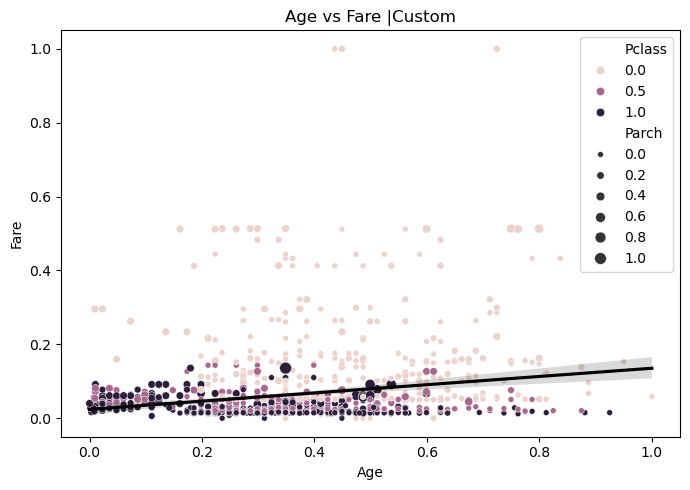

In [12]:
import seaborn as sns

plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df,
    x='Age',
    y='Fare',
    size='Parch',
    hue='Pclass' # palette="viridis" ,magma, plasma,coolwarm, Blues
)
sns.regplot(data=df, x="Age", y="Fare", scatter=False, color="black")

plt.title("Age vs Fare |Custom")
plt.tight_layout()
plt.show()


## Homework for Students
- **Pertemuan 12**: Clean a real-world dataset (from Kaggle or another source), perform normalization, handle outliers, and prepare the data for analysis.
- **Pertemuan 13**: Create a dashboard with multiple visualizations to summarize a dataset of your choice.

In [13]:
#12
# lakukan yang belum

import pandas as pd
import numpy as np

df = pd.read_csv("train_and_test2.xls")

# Rename
df = df.rename(columns={
    "Passengerid": "PassengerId",
    "2urvived": "Survived"
})

# Drop kolom zero.x yang tidak berguna
zero_cols = [col for col in df.columns if col.startswith("zero")]
df = df.drop(columns=zero_cols)

# 2. Normalisasi kolom numerik (kecuali id & target)
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
num_cols = num_cols.drop(["PassengerId", "Survived"])

for col in num_cols:
    df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

# 3. Handle Outliers pada Fare (clip 1%–99%)
q1 = df["Fare"].quantile(0.01)
q99 = df["Fare"].quantile(0.99)
df["Fare"] = df["Fare"].clip(lower=q1, upper=q99)

# 4. Drop duplikat
df = df.drop_duplicates()

# 5. Cek hasil
print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   float64
 4   sibsp        1309 non-null   float64
 5   Parch        1309 non-null   float64
 6   Pclass       1309 non-null   float64
 7   Embarked     1307 non-null   float64
 8   Survived     1309 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 92.2 KB
None


,PassengerId,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived
0,1,0.273456,0.014151,0.0,0.125,0.0,1.0,1.0,0
1,2,0.473882,0.139136,1.0,0.125,0.0,0.0,0.0,1
2,3,0.323563,0.015469,1.0,0.000,0.0,1.0,1.0,1
3,4,0.436302,0.103644,1.0,0.125,0.0,0.0,1.0,1
4,5,0.436302,0.015713,0.0,0.000,0.0,1.0,1.0,0


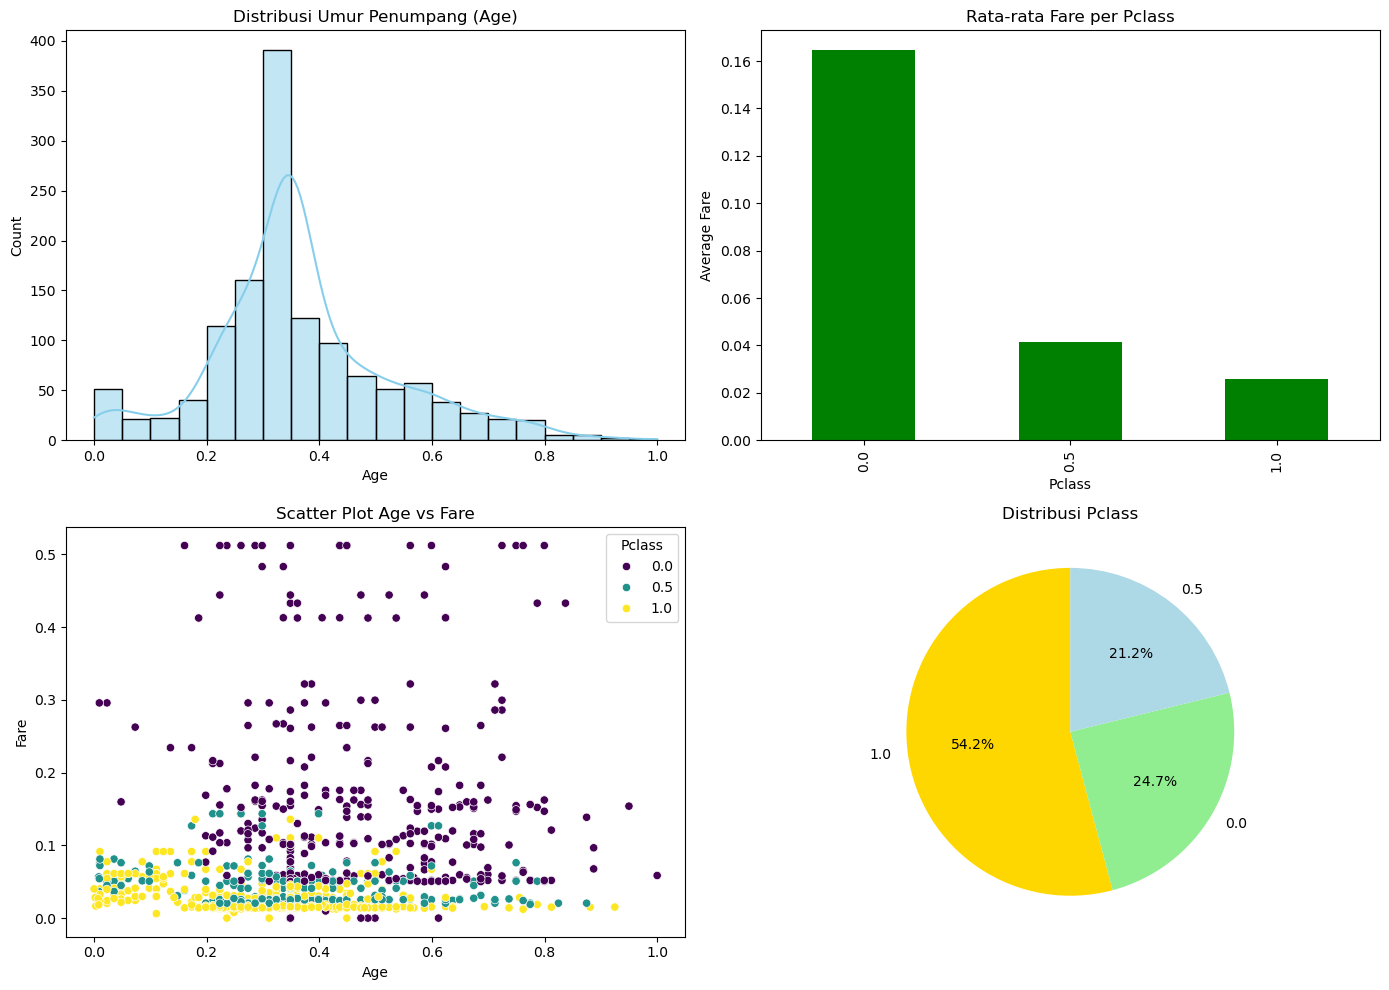

In [22]:
#13
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 10))

# Histogram Age
plt.subplot(2, 2, 1)
sns.histplot(df["Age"], bins=20, kde=True, color="skyblue")
plt.title("Distribusi Umur Penumpang (Age)")
plt.xlabel("Age")

# Bar Chart (Fare by Pclass)
plt.subplot(2, 2, 2)
fare_group = df.groupby("Pclass")["Fare"].mean()
fare_group.plot(kind="bar", color="green")
plt.title("Rata-rata Fare per Pclass")
plt.xlabel("Pclass")
plt.ylabel("Average Fare")

# 3. Scatter Plot Age vs Fare
plt.subplot(2, 2, 3)
sns.scatterplot(
    data=df,
    x="Age",
    y="Fare",
    hue="Pclass",
    palette="viridis"
)
plt.title("Scatter Plot Age vs Fare")

# Pie chart distribusi Pclass
plt.subplot(2, 2, 4)
df["Pclass"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    startangle=90,
    colors=["gold", "lightgreen", "lightblue"]
)
plt.title("Distribusi Pclass")
plt.ylabel("")

plt.tight_layout()
plt.show()


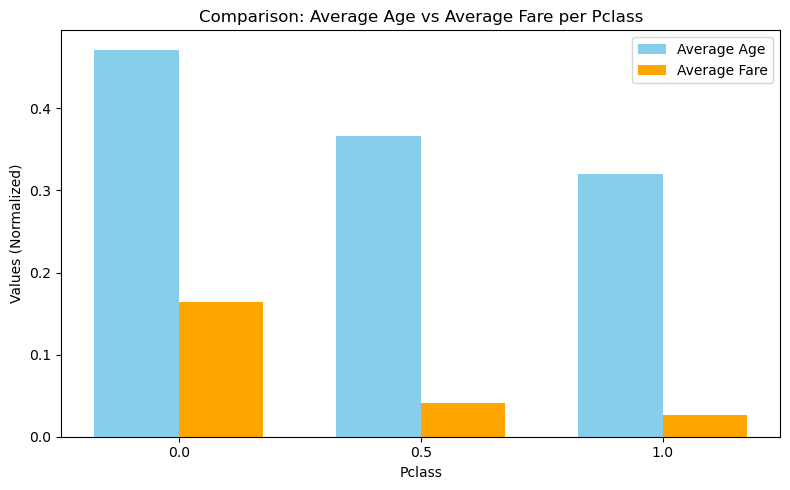

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# rata-rata Age dan Fare per Pclass
age_mean = df.groupby('Pclass')['Age'].mean()
fare_mean = df.groupby('Pclass')['Fare'].mean()

# Posisi bar
labels = age_mean.index
x = np.arange(len(labels))  # posisi dasar
width = 0.35                # lebar bar

plt.figure(figsize=(8, 5))

# Bar pertama (Age)
plt.bar(x - width/2, age_mean, width, label='Average Age', color='skyblue')

# Bar kedua (Fare)
plt.bar(x + width/2, fare_mean, width, label='Average Fare', color='orange')

# Labeling
plt.xlabel('Pclass')
plt.ylabel('Values (Normalized)')
plt.title('Comparison: Average Age vs Average Fare per Pclass')
plt.xticks(x, labels)
plt.legend()
plt.tight_layout()

plt.show()


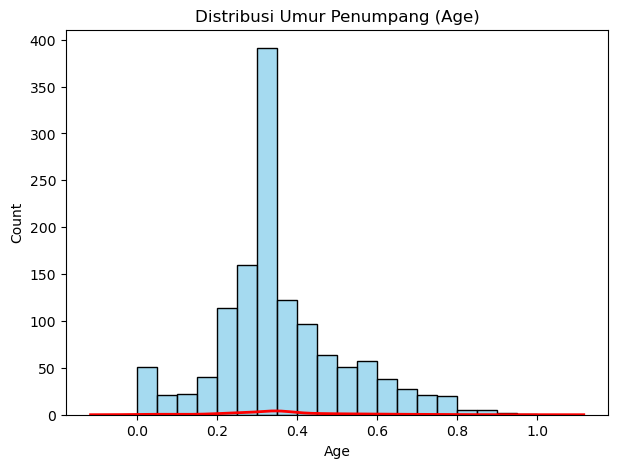

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))

# Histogram (bar)
sns.histplot(df["Age"], bins=20, color="skyblue")

# Garis KDE (dipisah)
sns.kdeplot(df["Age"], color="red", linewidth=2)

plt.title("Distribusi Umur Penumpang (Age)")
plt.xlabel("Age")
plt.show()
